# Título
Se declaran las librerías generales
Se escoge la proteina (uniprot_ID) y el grupo al que pertenece

In [101]:
from importlib import reload
from lib.main_func_p1 import path

import pandas as pd
import numpy as np

uniprot_data = ['P49841', 'kinase']
# uniprot_data = ['P22303', 'Non-IDG Family Targets']
uniprot_id = uniprot_data[0]
path_file = path(uniprot_id)

## Parte 1. Descarga y preparación de los datos


Se declaran las librerias y dependencias

In [102]:
import lib.main_func_p1
reload(lib.main_func_p1)
from lib.main_func_p1 import get_ligands

Se inicia el proceso con el ID de la proteina (uniprot) y el grupo al que pertenece

La siguiente función prepara los datos (proteina => compuestos), determinando el tipo de actividad:
 1. Busca el ID en la base de datos de CHEMBL
 2. Descarga la actividad registrada
 3. La filtra por los tipos de ensayo: 'IC50', 'EC50' y 'Ki'
 4. Elimina compuestos repetidos (quedandose con el menor valor)
 5. Convierte todos los valores a la undidad estandar 'nM'
 6. Agrega la columna: activity_type donde registra si el compuesto es activo, intermedio o inactivo
 7. Filtra activity_type: activo / inactivo (elimina los compuestos intermedios)
 8. Busca y elimina los compuestos duplicados
 9. Recupera los SMILES de los compuestos restantes (CHEMBL)
    9.1 Guarda el archivo 'uniprot_id_01_ligands_smiles.csv' con la información recuperada
 10. Determina el ADME (Lipinski) y filtra por el criterio de la regla de los 5
    10.1 Guarda el archivo 'uniprot_id_02_ligands_smiles_ADME_lipinski.csv' con la información recuperada

Finalmente, guarda el archivo 'uniprot_id_03_ligands_simles_activity_type.csv' con las columnas:
|molecule_chembl_id'| 'smiles'| 'activity_type'|

In [103]:
try:
    with open(f'{path_file}_03_ligands_smiles_activity_type.csv') as f:
        print('El archivo ya está en la base. No es necesario hacer este proceso')
        activity_df = pd.read_csv(f'{path_file}_03_ligands_smiles_activity_type.csv')
except FileNotFoundError:
    activity_df = get_ligands(uniprot_data)

El archivo ya está en la base. No es necesario hacer este proceso


El data set final solo tiene tres columnas: |molecule_chembl_id'| 'smiles'| 'activity_type'|
Se descartaron los compuestos que no cumplen la regla de los cinco.

In [104]:
activity_df.head()

,molecule_chembl_id,smiles,activity_type
0,CHEMBL322970,O=C1NC(=O)C(c2ccccc2[N+](=O)[O-])=C1Nc1ccc(O)c...,inactive
1,CHEMBL112564,CN(C)Cc1c(-c2n[nH]c(-c3ccncc3)n2)nnn1-c1nonc1N,inactive
2,CHEMBL321421,CCN(CC)Cc1c(C(=O)N/N=C/c2ccncc2)nnn1-c1nonc1N,inactive
3,CHEMBL115875,NNC(=O)c1nnn(-c2nonc2N)c1CN1CCCCC1,inactive
4,CHEMBL113168,Nc1nonc1-n1nnc(C(=O)NCCc2ccncc2)c1CN1CCCCC1,inactive


## Parte 2. Análisis estadístico de los datos

Se declaran las librerias y dependencias
Se carga los data set para no volver a ejecutar la primera parte (tarda mucho tiempo la primera vez)

In [105]:
from lib.main_func_p2 import get_properties_stats, plot_radarplot
import matplotlib.pyplot as plt
import seaborn as sns

path_file = path(uniprot_id)
ADME_df = pd.read_csv(f'{path_file}_02_ligands_smiles_ADME_lipinski.csv')
print('Archivo ADME_df cargado')
activity_df = pd.read_csv(f'{path_file}_03_ligands_smiles_activity_type.csv')
print('Archivo SMILES + tipo_actividad cargado')

Archivo ADME_df cargado
Archivo SMILES + tipo_actividad cargado


In [106]:
ADME_df.head()

,molecule_chembl_id,smiles,MW,HBA,HBD,LogP,activity_type
0,CHEMBL322970,O=C1NC(=O)C(c2ccccc2[N+](=O)[O-])=C1Nc1ccc(O)c...,359.030898,6,3,2.4334,inactive
1,CHEMBL112564,CN(C)Cc1c(-c2n[nH]c(-c3ccncc3)n2)nnn1-c1nonc1N,353.146104,11,2,0.1412,inactive
2,CHEMBL321421,CCN(CC)Cc1c(C(=O)N/N=C/c2ccncc2)nnn1-c1nonc1N,384.177070,11,2,0.2332,inactive
3,CHEMBL115875,NNC(=O)c1nnn(-c2nonc2N)c1CN1CCCCC1,307.150521,10,3,-1.1781,inactive
4,CHEMBL113168,Nc1nonc1-n1nnc(C(=O)NCCc2ccncc2)c1CN1CCCCC1,397.197471,10,2,0.5859,inactive


### Estadística ADME

In [107]:
data_stats = get_properties_stats(ADME_df)
print('> Datos estadísticos de los compuestos filtrados por la regla de los cinco')
data_stats

> Datos estadísticos de los compuestos filtrados por la regla de los cinco


,mean,std
HBD,1.67,1.14
HBA,5.24,1.98
MW,367.81,82.71
LogP,3.26,1.32


> Resumen (gráfico) de las estadísticas


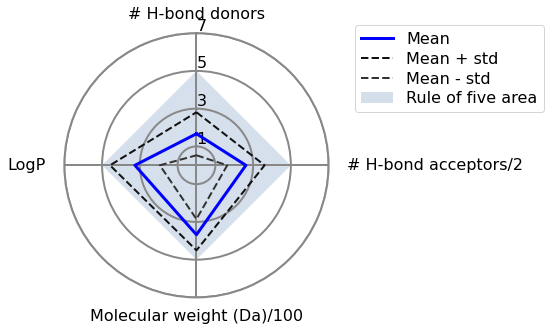

In [108]:
print('> Resumen (gráfico) de las estadísticas')
plot_radarplot(uniprot_id, data_stats)

<Figure size 1440x1440 with 0 Axes>

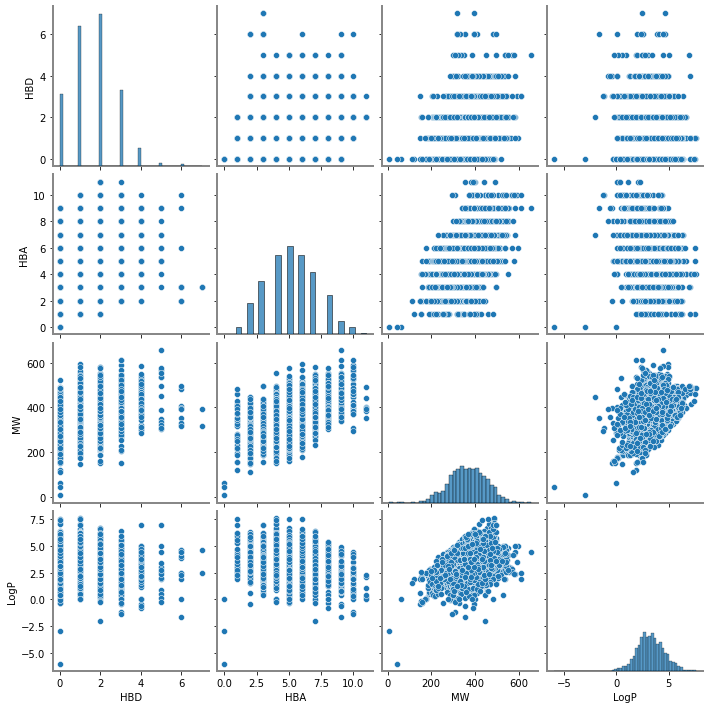

In [109]:
fig = plt.figure(figsize=(20, 20))
ax = sns.pairplot(data=ADME_df, vars=['HBD', 'HBA', 'MW', 'LogP'])
plt.show()

plt.savefig(f'{path_file}_AllinOne.png', bbox_inches='tight')
plt.close()

### Estadísticas tipo de actividad

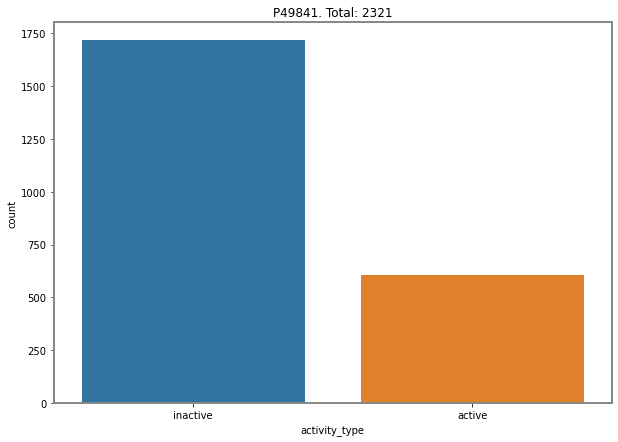

In [110]:
fig = plt.figure()
fig.set_size_inches(10,7)
ax = sns.countplot(x='activity_type', data=ADME_df, order=['inactive', 'active'])
ax.set_title(f'{uniprot_id}. Total: {len(ADME_df)}')
plt.show()

plt.savefig(f'{path_file}_activity_type.png', bbox_inches='tight')
plt.close()

## Parte 3. Descarga de los fingerprint
Se declaran las librerias y dependencias
Se carga los data set para no volver a ejecutar la primera parte (tarda mucho tiempo la primera vez)

In [111]:
import lib.main_func_p3
reload(lib.main_func_p3)
from lib.main_func_p3 import export_train_set_pickle
import pandas as pd

path_file = path(uniprot_id)
activity_df = pd.read_csv(f'{path_file}_03_ligands_smiles_activity_type.csv')

A partir del SMILE se encuentra la representación vectorial de la fingerprint. Hay una gran variedad de fingerprints, la siguiente lista tiene algunas de las más comunes.
La lista completa está en `main_func_p3.py`

In [112]:
"""
maccs                   MACCS KEys              nBits = 167
morgan2_c               ECFP4                   nBits = 1024
morgan3_c               ECFP6                   nBits = 1024
topological_torsions_b  TORSION                 nBits = 2048
rdkit5_b                RDK5                    nBits = 1024
avalon_512_b            AVALON                  nBits = 512
"""
fp_list = ['maccs', 'morgan2_c', 'morgan3_c', 'topological_torsions_b', 'rdkit5_b', 'avalon_512_b']

La siguiente función encuentra las fingerprints seleccionadas (lista fp_list) de los compuestos del data set y cambia la columna activity_type por activity, siendo 0: inactive y 1: active.
Para no volver a realizar todo el proceso anterior, se puede guardar el data set en formato `pickle` con la información de las fingerprints y la clasificación

In [113]:
try:
    with open(f'{path_file}_dataset') as f:
        print('El archivo ya está en la base. No es necesario hacer este proceso')
        fp_df = pd.read_pickle(f'{path_file}_dataset')
except FileNotFoundError:
    # Construct a molecule from a SMILES string
    fp_df = export_train_set_pickle(activity_df, fp_list)
    fp_df.to_pickle(f'{path_file}_dataset')
    print(f'>>> SAVED: {uniprot_id}_dataset')

El archivo ya está en la base. No es necesario hacer este proceso


Este es un ejemplo del conjunto de entrenamiento guardado

In [114]:
fp_df.head()

,molecule_chembl_id,maccs,morgan2_c,morgan3_c,topological_torsions_b,rdkit5_b,avalon_512_b,activity
0,CHEMBL322970,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...","[1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, ...",0.0
1,CHEMBL112564,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, ...","[1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, ...",0.0
2,CHEMBL321421,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, ...","[1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, ...",0.0
3,CHEMBL115875,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, ...","[1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, ...",0.0
4,CHEMBL113168,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...","[0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, ...","[1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, ...",0.0


## Parte 4. Módelo de clasificación Random Forest Classification
Se declaran las librerias y dependencias
Se descarga el archivo con la información de la fingerprints y la clasificación

In [140]:
# sklearn:
from sklearn.ensemble import RandomForestClassifier
# save the models
import pickle

In [190]:
import lib.main_func_p4_CLF_models
reload(lib.main_func_p4_CLF_models)
from lib.main_func_p4_CLF_models import create_param_grid, create_results_file, model_clf_fp, plot_ROC_curve, model_clf
import pandas as pd

path_file = path(uniprot_id)
fp_df = pd.read_pickle(f'{path_file}_dataset')
fp_list = list(fp_df.columns)[1:-1] # Reload finger print list
print(f'>>> LOAD: 05_{uniprot_id}_dataset')

>>> LOAD: 05_P49841_dataset


Resumen de la clasificación de la actividad:

In [193]:
print(fp_df.activity.value_counts())
ratio = round(list(fp_df.activity.value_counts())[0] / list(fp_df.activity.value_counts())[1], 2)
print(f'Razón [{ratio}: 1]')

0.0    1716
1.0     605
Name: activity, dtype: int64
Razón [2.84: 1]


El conjunto de datos de entrenamiento está desbalanceado

Para trabajar con conjuntos desbalanceados se puede:
1. Medir diferentes métricas de desempeño
2. Remuestreo del conjunto, submuestreo de la clase dominante
3. Penalizar el modelo

### Submuestreo clase dominante

La idea es escoger aleatoriamente n muestras de la clase dominante, donde n es el número de muestras de la otra clase, de esta manera ambas categorías tendrán el mismo número de muestras

In [196]:
fp_df_active = fp_df[fp_df.activity == 1]
fp_df_inactive = fp_df[fp_df.activity == 0]

new_ratio = min(ratio , 2)
n_sample = round(new_ratio * min(len(fp_df_inactive), len(fp_df_active)))
if len(fp_df_active) > len(fp_df_inactive):
    fp_df_active = fp_df_active.sample(n_sample)
elif len(fp_df_inactive) > len(fp_df_active):
    fp_df_inactive = fp_df_inactive.sample(n_sample)
fp_df_down = pd.concat([fp_df_active, fp_df_inactive], ignore_index=True).sample(frac=1)
fp_df_down.reset_index(drop=True, inplace=True)
fp_df_down.head()

,molecule_chembl_id,maccs,morgan2_c,morgan3_c,topological_torsions_b,rdkit5_b,avalon_512_b,activity
0,CHEMBL250369,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, ...","[1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, ...",0.0
1,CHEMBL4467292,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...","[1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, ...",0.0
2,CHEMBL2024372,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, ...","[0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, ...","[1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, ...",0.0
3,CHEMBL4640019,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, ...","[0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, ...",1.0
4,CHEMBL4071773,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, ...","[1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, ...","[1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, ...",1.0


In [197]:
# Renombrar dataframes para trabajar con el nuevo
fp_df_bkup = fp_df.copy()
fp_df = fp_df_down.copy()
print('# compuestos: ', len(fp_df))
print(fp_df.activity.value_counts())
ratio = round(list(fp_df.activity.value_counts())[0] / list(fp_df.activity.value_counts())[1], 2)
print(f'Razón [{ratio}: 1]')

# compuestos:  1815
0.0    1210
1.0     605
Name: activity, dtype: int64
Razón [2.0: 1]


Comparación del rendimiento del modelo Random Forest clf con las diferentes _fingerprints_. Parámetros por defecto.

In [198]:
Rf_clf = RandomForestClassifier()
n_splits = 3
seed = 1
df_model, results_ROC_fp = model_clf_fp(Rf_clf, fp_df, fp_list, uniprot_id, seed=seed, n_splits=n_splits)
print(Rf_clf.get_params(),'\n-------------------------------------')
df_model

Results RandomForestClassifier: 
-------------------------------------
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False} 
-------------------------------------


,FINGERPRINT,AUC_train,acc_train,sen_train,spe_train,pre_train,AUC_test,acc_test,sen_test,spe_test,pre_test,f1_score,confusion_m,time
0,maccs,0.999957,0.995868,0.995868,0.995868,0.99177,0.912386,0.865014,0.752066,0.921488,0.827273,0.787879,"[[223, 19], [30, 91]]",0.625886
1,morgan2_c,0.999999,0.999311,0.997934,1.000000,1.00000,0.939809,0.900826,0.776860,0.962810,0.912621,0.839286,"[[233, 9], [27, 94]]",1.817159
2,morgan3_c,0.999999,0.999311,0.997934,1.000000,1.00000,0.930179,0.895317,0.743802,0.971074,0.927835,0.825688,"[[235, 7], [31, 90]]",1.844197
3,topological_torsions_b,0.999999,0.999311,0.997934,1.000000,1.00000,0.930896,0.884298,0.752066,0.950413,0.883495,0.812500,"[[230, 12], [30, 91]]",1.648227
4,rdkit5_b,0.999999,0.999311,0.997934,1.000000,1.00000,0.922188,0.870523,0.743802,0.933884,0.849057,0.792952,"[[226, 16], [31, 90]]",1.139719
5,avalon_512_b,0.999999,0.999311,0.997934,1.000000,1.00000,0.937299,0.884298,0.776860,0.938017,0.862385,0.817391,"[[227, 15], [27, 94]]",0.863003


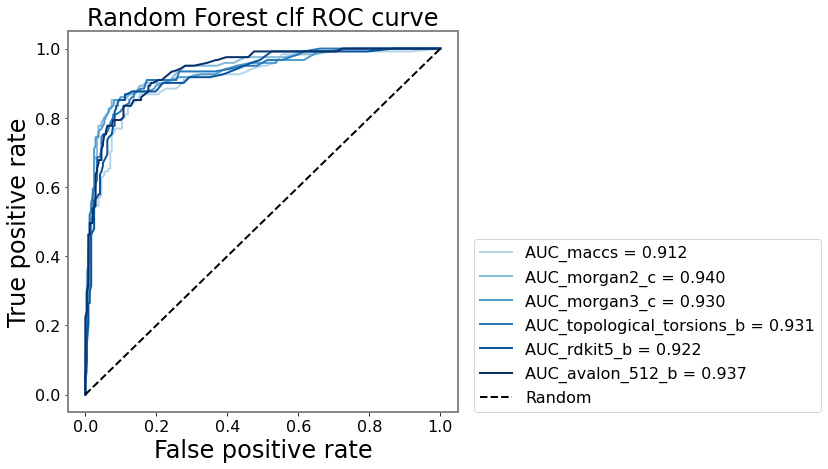

In [199]:
model_name = 'Random Forest clf'
metrics_ROC = results_ROC_fp
metrics_ROC_name = fp_list
plot_ROC_curve(metrics_ROC, metrics_ROC_name, model_name)

Es un caso de *overfiting*, ya que el AUC_train (área bajo la curva ROC del conjunto de entrenamiento) es 1.
Se puede deber a la cantidad de datos o a la cantidad de características.
Opciones:
1. Hacer el modelo más simple.
2. Ajustar los hyperparámetros
3. Reducir la dimensión de las características

Se escoge la fingerprint *maacs*, porque muestra un buen rendimiento y tiene la menos dimensión (167).
El objetivo ahora es intentar optimizar el modelo utilizando la fingerprint **maccs**

In [207]:

Rf_clf_over = RandomForestClassifier(n_jobs=-1)
n_splits = 10
seed = 1
fp_name = 'maccs'
# fp_name = 'avalon_512_b'
df_model_over, results_ROC_over = model_clf(Rf_clf_over, fp_df, fp_name, uniprot_id,
                                              params_dict=None, seed=seed, n_splits=n_splits)
# print(Rf_clf_tuned.get_params())
df_model_over

Results RandomForestClassifier: 
-------------------------------------
              precision    recall  f1-score   support

         0.0       0.88      0.90      0.89       242
         1.0       0.80      0.75      0.77       121

    accuracy                           0.85       363
   macro avg       0.84      0.83      0.83       363
weighted avg       0.85      0.85      0.85       363



,Metric,Train,Test
0,AUC,0.999898,0.928557
1,accuracy,0.99449,0.853994
2,sensitivity (recall),0.987603,0.987603
3,specificity,0.997934,0.904959
4,precision,0.995833,0.798246
5,f1_score,0.991701,0.774468
6,confusion_matrix,"[[966, 2], [6, 478]]","[[219, 23], [30, 91]]"


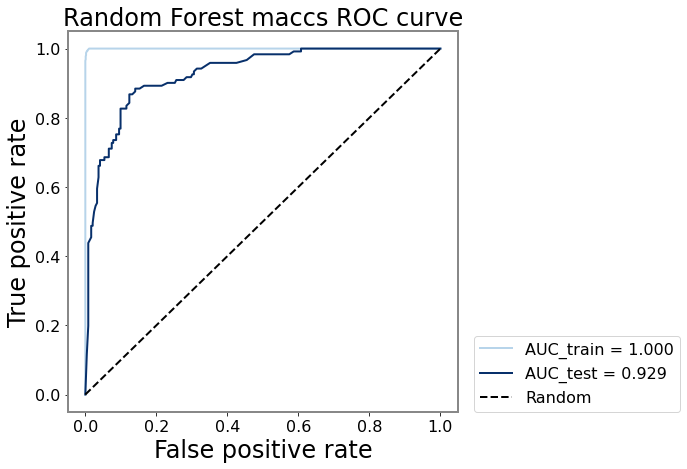

In [208]:
model_name = f'Random Forest {fp_name}'
metrics_ROC = results_ROC_fp
metrics_ROC_name = ['train', 'test']
plot_ROC_curve(results_ROC_over, metrics_ROC_name, model_name)

### Grilla de parámetros Random Forest

Para encontrar el mejor modelo se hace una búsqueda de _hyper parámetros_. Se escoge la siguiente grilla, para un total de 253400 opciones.

In [209]:
param_grid_all = {'n_estimators': np.arange(60, 220, 20),
              'min_samples_split': np.arange(2, 10, 2),
              'min_samples_leaf': np.arange(5, 30, 5),
              'max_features': ['auto', 0.6, 0.7, 0.8, 0.9, 1],
              'max_leaf_nodes': np.arange(40, 220, 20),
              'oob_score': [True, False],
              'max_samples': ['None', 0.7, 0.8, 0.9],
              'criterion': ['gini', 'entropy']}
file_name = 'params_grid_RFC.csv'
# Crear la grilla
create_param_grid(param_grid_all, 'params_grid_RFC.csv')

La búsqueda y optimización de los hyper parámetros se realiza fuera de este notebook para realizar múltiples pruebas en paralelo. El excel `results_grid_params_RFC` tiene los resultados.

### Construcción y verificación del modelo
Una vez escogidos los hypoer parámetros, se vuelve a ejecutar el modelo. Como se puede ver en las curvas ROC, se redujo el overfiting y las métricas tienen resultados positivos

In [234]:
# >>> OPC 1: Buen desempeño, esta en el top de la mayoría de métricas. Presenta un poco de overfitting
# params_dict = {'n_estimators': 60, 'min_samples_split': 6, 'min_samples_leaf': 5, 'max_features': 0.9,
#                'max_leaf_nodes': 180, 'oob_score': True, 'max_samples': None, 'criterion': 'gini'}

# >>> OPC 2: Disminución de overfiting maacs
params_dict = {'n_estimators': 60, 'min_samples_split': 4, 'min_samples_leaf': 10, 'max_features': 1.0,
               'max_leaf_nodes': 80, 'oob_score': True, 'max_samples': 0.7, 'criterion': 'gini'}

# >>> OPC 2: Disminución de overfiting avalon_512_b
# params_dict = {'n_estimators': 60, 'min_samples_split': 8, 'min_samples_leaf': 25, 'max_features': 0.8,
#                'max_leaf_nodes': 200, 'oob_score': False, 'max_samples': None, 'criterion': 'gini'}

Rf_clf_tuned = RandomForestClassifier(n_jobs=-1)
n_splits = 5
seed = 1
df_model_tuned, results_ROC_fp = model_clf(Rf_clf_tuned, fp_df, fp_name, uniprot_id,
                                              params_dict=params_dict, seed=seed, n_splits=n_splits)
# print(Rf_clf_tuned.get_params())
df_model_tuned

Results RandomForestClassifier: 
-------------------------------------
              precision    recall  f1-score   support

         0.0       0.89      0.92      0.90       242
         1.0       0.83      0.77      0.80       121

    accuracy                           0.87       363
   macro avg       0.86      0.85      0.85       363
weighted avg       0.87      0.87      0.87       363



,Metric,Train,Test
0,AUC,0.955653,0.906922
1,accuracy,0.883609,0.870523
2,sensitivity (recall),0.772727,0.772727
3,specificity,0.93905,0.921488
4,precision,0.863741,0.830357
5,f1_score,0.815703,0.798283
6,confusion_matrix,"[[909, 59], [110, 374]]","[[223, 19], [28, 93]]"


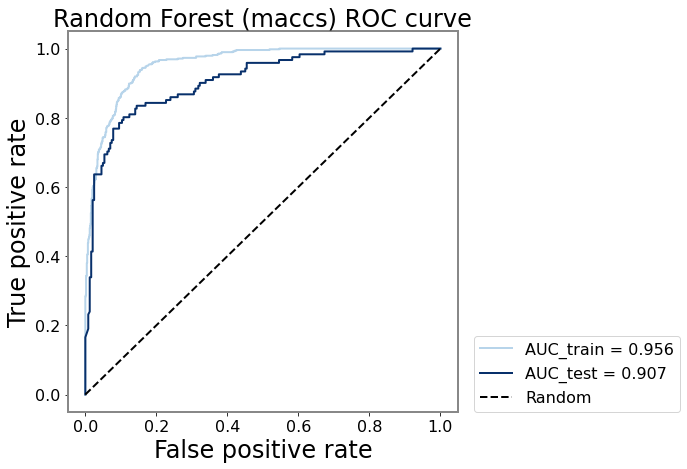

In [235]:
from lib.main_func_p4_CLF_models import plot_ROC_curve

model_name = f'Random Forest ({fp_name})'
metrics_ROC = results_ROC_fp
metrics_ROC_name = ['train', 'test']
plot_ROC_curve(metrics_ROC, metrics_ROC_name, model_name)

### Guardar y exportar el modelo
El modelo elegido se va a exportar y a utilizar con un conjunto de decoys y el conjunto de test.

In [236]:
with open(f'{path_file}_RFclf_{fp_name}_model', 'wb') as f:
    pickle.dump(Rf_clf_tuned, f)
print(f'{uniprot_id}_RFclf_{fp_name}_model SAVED')

P49841_RFclf_maccs_model SAVED


## Parte 5. Uso del modelo

### Carga del modelo

In [237]:
with open(f'{path_file}_RFclf_{fp_name}_model', 'rb') as f:
    model_RFC = pickle.load(f)
print(f'{uniprot_id}_RFclf_{fp_name}_model LOAD')
print('Hyper parámetros : \n', model_RFC.get_params())

P49841_RFclf_maccs_model LOAD
Hyper parámetros : 
 {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': 80, 'max_samples': 0.7, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 10, 'min_samples_split': 4, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 60, 'n_jobs': -1, 'oob_score': True, 'random_state': None, 'verbose': 0, 'warm_start': False}


### Carga del conjunto de prueba

OBS: El modelo no conoce los datos del conjunto de prueba

In [238]:
with open(f'{path_file}_dataset_test', 'rb') as f:
    df_test = pickle.load(f)

df_test['type'] = 'test_inactive'
df_test.loc[df_test[df_test.activity == 1.0].index, 'type'] = 'test_active'
df_test = df_test[['type', fp_name, 'activity']]
print(df_test.shape)
print(df_test.activity.value_counts())
df_test.head()

(363, 3)
0.0    242
1.0    121
Name: activity, dtype: int64


,type,maccs,activity
0,test_inactive,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.0
1,test_active,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.0
2,test_inactive,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.0
3,test_inactive,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.0
4,test_inactive,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.0


### Carga y preparación de los decoys
El archivo {uniprot_id}_decoys_final.ism contiene la lista de decoys de la proteina.
Se carga el archivo y se convierte en un data set, por ahora solo contiene el SMILE

In [254]:
df_decoys = pd.DataFrame(columns=['smiles'])
list_d = list()
with open(f'{path_file}_decoys_final.ism', 'rb') as f:
    decoys_line = f.readlines()
    for line in decoys_line:
        line = line.decode('UTF-8').split()
        list_d.append(line)
df_decoys = pd.DataFrame(list_d, columns=['smiles', 'id'])
df_decoys = df_decoys['smiles']
print(df_decoys.shape)
# Escoger una cantidad igual al conjunto de prueba
df_decoys = df_decoys.sample(len(df_test), ignore_index=True)
print(len(df_decoys))
df_decoys.head()

(35850,)
363


0    CC1=C([C@@H](C2=C(N1)C[C@@H](CC2=O)c3ccccc3)c4...
1    c1ccc(cc1)CC2=C[C@H]3C[NH+]4[C@@H](C[C@@H]3C=C...
2        Cc1ccc(c(c1)[N+](=O)[O-])N[C@H](C)c2c(ccs2)Br
3    CC[NH+]1[C@H]([C@H](C[C@@]1(C)CO)C[NH2+]Cc2cc3...
4       c1ccc2c(c1)CCC[C@@]2(CNC(=O)Cn3c4ccccc4oc3=O)O
Name: smiles, dtype: object

Ahora hay que encontrar la fingerprint a partir del SMILE.

In [ ]:
from lib.main_func_p3 import calculate_fp

def calculate_onefp(df, fp_name):
    from rdkit import Chem
    df['mol'] = df.smiles.map(lambda smile: Chem.MolFromSmiles(smile))
    df[fp_name] = df.mol.apply(calculate_fp, args=[fp_name])

calculate_onefp(df_decoys, fp_name)
df_decoys.drop_duplicates(subset=['smiles'], inplace=True)
df_decoys.reset_index(inplace=True, drop=True)
df_decoys = df_decoys.drop(['mol'], axis=1)
df_decoys = df_decoys.drop(['smiles'], axis=1)
df_decoys['type'] = 'decoy'
df_decoys = df_decoys[['type', fp_name]]
print(df_decoys.shape)
df_decoys.head()

### Predicciones

In [ ]:
x_decoy = df_decoys[fp_name].tolist()
pred_decoy = model_RFC.predict(x_decoy)
prediction_prob = model_RFC.predict_proba(x_decoy)[:,1]
prediction_prob = np.array(prediction_prob)
df_decoys['prediction'] = pred_decoy
df_decoys['prediction_prob'] = prediction_prob
df_decoys.head()

In [ ]:
df_decoys.prediction.value_counts()

In [ ]:
x_test = df_test[fp_name].tolist()
pred_test = model_RFC.predict(x_test)
prediction_prob_test = model_RFC.predict_proba(x_test)[:,1]
prediction_prob_test = np.array(prediction_prob_test)
df_test['prediction'] = pred_test
df_test['prediction_prob'] = prediction_prob_test
df_test.head()

In [ ]:
from lib.main_func_p4_CLF_models import plot_ROC_curve
from sklearn.metrics import roc_curve, auc, classification_report
fpr_test, tpr_test, _ = roc_curve(df_test['activity'].tolist(), prediction_prob_test)
auc_score_test = auc(fpr_test, tpr_test)
metrics_ROC = (fpr_test, tpr_test, auc_score_test)
print(classification_report(df_test['activity'].tolist(), pred_test))
plot_ROC_curve([metrics_ROC], ['test_set'], 'RFC')

In [ ]:
df = pd.concat([df_test.drop(['activity'], axis=1), df_decoys], ignore_index=True)

print(df.type.value_counts())
df.head()

In [ ]:
import seaborn as sns
sns.displot(data=df, x='prediction_prob', hue="type", kind="kde", bw_adjust=.2)